### Computing the overal F1 score

In [2]:
import numpy as np
import os
from sklearn.metrics import f1_score

def load_and_sort_npy_files(directory):
    """
    Loads and sorts .npy files from a specified directory based on their filenames.
    
    Args:
    - directory (str): The path to the directory containing .npy files.
    
    Returns:
    - List of file paths sorted by filename.
    """
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]
    npy_files.sort()  # Sort filenames alphabetically
    return [os.path.join(directory, file) for file in npy_files]

def compute_overall_f1_score(ground_truth_dir, preds_dir):
    """
    Computes the overall F1 score by comparing each ground truth file with its corresponding prediction file.
    
    Args:
    - ground_truth_dir (str): Path to the directory containing the ground truth .npy files.
    - preds_dir (str): Path to the directory containing the prediction .npy files.
    
    Returns:
    - overall_f1 (float): The overall F1 score across all files.
    """
    # Load and sort ground truth and prediction files
    ground_truth_files = load_and_sort_npy_files(ground_truth_dir)
    preds_files = load_and_sort_npy_files(preds_dir)
    
    all_ground_truth = []
    all_preds = []

    # Loop over each pair of corresponding ground truth and prediction files
    for gt_file, pred_file in zip(ground_truth_files, preds_files):
        ground_truth = np.load(gt_file)
        preds = np.load(pred_file)

        # Assuming the ground truth and predictions are numpy arrays with the same shape
        all_ground_truth.extend(ground_truth.flatten())  # Flatten to make it 1D for F1 calculation
        all_preds.extend(preds.flatten())  # Flatten to make it 1D for F1 calculation

    # Compute F1 score
    overall_f1 = f1_score(all_ground_truth, all_preds, average='weighted')
    return overall_f1

# Example usage:
ground_truth_directory = '/home/glab/EEGNET/kfolds_results/ground_truth'  # Replace with your ground truth directory
preds_directory = '/home/glab/EEGNET/kfolds_results/preds'  # Replace with your predictions directory

# Compute overall F1 score
overall_f1 = compute_overall_f1_score(ground_truth_directory, preds_directory)
print(f"Overall F1 Score: {overall_f1:.4f}")


Overall F1 Score: 0.9849


In [9]:
import numpy as np
import os
from sklearn.metrics import matthews_corrcoef

def load_and_sort_npy_files(directory):
    """
    Loads and sorts .npy files from a specified directory based on their filenames.
    
    Args:
    - directory (str): The path to the directory containing .npy files.
    
    Returns:
    - List of file paths sorted by filename.
    """
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]
    npy_files.sort()  # Sort filenames alphabetically
    return [os.path.join(directory, file) for file in npy_files]

def compute_overall_mcc(ground_truth_dir, preds_dir):
    """
    Computes the overall MCC by comparing each ground truth file with its corresponding prediction file.
    
    Args:
    - ground_truth_dir (str): Path to the directory containing the ground truth .npy files.
    - preds_dir (str): Path to the directory containing the prediction .npy files.
    
    Returns:
    - overall_mcc (float): The overall MCC score across all files.
    """
    # Load and sort ground truth and prediction files
    ground_truth_files = load_and_sort_npy_files(ground_truth_dir)
    preds_files = load_and_sort_npy_files(preds_dir)
    
    all_ground_truth = []
    all_preds = []

    # Loop over each pair of corresponding ground truth and prediction files
    for gt_file, pred_file in zip(ground_truth_files, preds_files):
        ground_truth = np.load(gt_file)
        preds = np.load(pred_file)

        # Assuming the ground truth and predictions are numpy arrays with the same shape
        all_ground_truth.extend(ground_truth.flatten())  # Flatten to make it 1D for MCC calculation
        all_preds.extend(preds.flatten())  # Flatten to make it 1D for MCC calculation

    # Compute MCC score
    overall_mcc = matthews_corrcoef(all_ground_truth, all_preds)
    return overall_mcc

# Example usage:
ground_truth_directory = '/home/glab/EEGNET/kfolds_results/ground_truth'  # Replace with your ground truth directory
preds_directory = '/home/glab/EEGNET/kfolds_results/preds'  # Replace with your predictions directory

# Compute overall MCC score
overall_mcc = compute_overall_mcc(ground_truth_directory, preds_directory)
print(f"Overall MCC Score: {overall_mcc:.4f}")


Overall MCC Score: 0.9706


### Per fold Results

In [20]:
import numpy as np
import os
from sklearn.metrics import f1_score, matthews_corrcoef
from tabulate import tabulate  # Optional: for prettier console output
import csv

def load_and_sort_npy_files(directory):
    # Sort files by fold number in the filename
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]
    npy_files.sort(key=lambda x: int(x.split('_fold')[1].split('.npy')[0]))  # Sort by fold number
    return [os.path.join(directory, f) for f in npy_files]

def compute_global_f1_and_mcc_per_fold(gt_dir, pred_dir, save_csv=False, output_csv="global_f1_and_mcc_per_fold.csv"):
    gt_files = load_and_sort_npy_files(gt_dir)
    pred_files = load_and_sort_npy_files(pred_dir)

    if len(gt_files) != len(pred_files):
        raise ValueError("Mismatch in number of ground truth and prediction files.")

    results = []
    headers = ['Fold', 'Global F1 Score', 'MCC Score']

    # Loop through each pair of ground truth and predicted files
    for i, (gt_path, pred_path) in enumerate(zip(gt_files, pred_files), start=1):
        fold_label = f"Fold {i}"  # Label fold as "Fold 1", "Fold 2", ..., "Fold 10"
        y_true = np.load(gt_path).flatten()
        y_pred = np.load(pred_path).flatten()

        # Compute global F1 score for each fold
        global_f1 = f1_score(y_true, y_pred, average='weighted')
        
        # Compute Matthews Correlation Coefficient (MCC) for each fold
        mcc = matthews_corrcoef(y_true, y_pred)

        # Store the results
        results.append([fold_label, global_f1, mcc])

    # Pretty-print the results as a table
    print(tabulate(results, headers=headers, floatfmt=".4f"))

    # Save to CSV if requested
    save_csv=False
    if save_csv:
        with open(output_csv, 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(headers)
            for row in results:
                writer.writerow([row[0]] + [f"{x:.4f}" if isinstance(x, float) else x for x in row[1:]])
        

    return results

# ==== CONFIGURATION ====
ground_truth_dir = '/home/glab/EEGNET_Final/kfolds_results/ground_truth'  # Replace with your ground truth directory
preds_dir = '/home/glab/EEGNET_Final/kfolds_results/preds'  # Replace with your prediction directory
save_csv = True  # Set to True if you want to save the result to a CSV file

# ==== RUN ====
compute_global_f1_and_mcc_per_fold(ground_truth_dir, preds_dir, save_csv=save_csv)


Fold       Global F1 Score    MCC Score
-------  -----------------  -----------
Fold 1              0.9740       0.9546
Fold 2              0.9911       0.9815
Fold 3              0.9880       0.9723
Fold 4              0.9754       0.9193
Fold 5              0.9689       0.9312
Fold 6              0.9764       0.9477
Fold 7              0.9924       0.9829
Fold 8              0.9962       0.9929
Fold 9              0.9792       0.9503
Fold 10             0.9952       0.9894


[['Fold 1', 0.9740480187073539, 0.9545988726441966],
 ['Fold 2', 0.9911176831417178, 0.9814778009574653],
 ['Fold 3', 0.9880425969275798, 0.9723320954534653],
 ['Fold 4', 0.9753705250781275, 0.9193307199914875],
 ['Fold 5', 0.9689009667777161, 0.9311647525369838],
 ['Fold 6', 0.9764196317991044, 0.9477031980493525],
 ['Fold 7', 0.9923713504540572, 0.9828990833921688],
 ['Fold 8', 0.996154700552406, 0.9929481631566985],
 ['Fold 9', 0.9792036347462734, 0.9503165530419474],
 ['Fold 10', 0.9951518090579404, 0.9893543769017867]]

### PEr class Results

In [8]:
import numpy as np
import os
import csv
from sklearn.metrics import f1_score
from tabulate import tabulate

def load_and_sort_npy_files(directory):
    # Sort files based on fold number extracted from filename
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]
    npy_files.sort(key=lambda x: int(x.split('_fold')[1].split('.npy')[0]))
    return [os.path.join(directory, f) for f in npy_files]

def compute_classwise_f1_per_fold(gt_dir, pred_dir, save_csv=False, output_csv="classwise_f1_per_fold.csv"):
    gt_files = load_and_sort_npy_files(gt_dir)
    pred_files = load_and_sort_npy_files(pred_dir)

    if len(gt_files) != len(pred_files):
        raise ValueError("Mismatch in number of ground truth and prediction files.")

    results = []
    headers = ['Fold', 'F1 REM', 'F1 NREM', 'F1 AWAKE']
    all_f1_rem, all_f1_nrem, all_f1_awake = [], [], []

    for i, (gt_path, pred_path) in enumerate(zip(gt_files, pred_files), start=1):
        fold_label = f"Fold {i}"
        y_true = np.load(gt_path).flatten()
        y_pred = np.load(pred_path).flatten()

        f1_scores = f1_score(y_true, y_pred, average=None, labels=[0, 1, 2])
        results.append([fold_label, f1_scores[0], f1_scores[1], f1_scores[2]])

        all_f1_rem.append(f1_scores[0])
        all_f1_nrem.append(f1_scores[1])
        all_f1_awake.append(f1_scores[2])

    # Compute mean F1 scores across all folds
    mean_f1 = [np.mean(all_f1_rem), np.mean(all_f1_nrem), np.mean(all_f1_awake)]
    results.append(['Mean F1 Score'] + mean_f1)

    # Print formatted table
    print(tabulate(results, headers=headers, floatfmt=".4f"))

    # Save to CSV
    if save_csv:
        with open(output_csv, 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(headers)
            for row in results:
                writer.writerow([row[0]] + [f"{x:.4f}" if isinstance(x, float) else x for x in row[1:]])
        print(f"\nPer-class F1 scores saved to: {output_csv}")

    return results

# ==== CONFIG ====
ground_truth_dir = '/home/glab/EEGNET/kfolds_results/ground_truth'
preds_dir = '/home/glab/EEGNET/kfolds_results/preds'
save_csv = True

# ==== RUN ====
compute_classwise_f1_per_fold(ground_truth_dir, preds_dir, save_csv=save_csv)


Fold             F1 REM    F1 NREM    F1 AWAKE
-------------  --------  ---------  ----------
Fold 1           0.9769     1.0000      0.9641
Fold 2           0.9929     0.9412      0.9904
Fold 3           0.9915     0.9333      0.9957
Fold 4           0.9872     0.9524      0.9136
Fold 5           0.9793     0.9130      0.9516
Fold 6           0.9878     0.8889      0.9610
Fold 7           0.9944     0.9474      1.0000
Fold 8           0.9956     0.9818      0.9981
Fold 9           0.9866     0.9074      0.9937
Fold 10          0.9919     0.9500      0.9982
Mean F1 Score    0.9884     0.9415      0.9766

Per-class F1 scores saved to: classwise_f1_per_fold.csv


[['Fold 1', 0.9768637532133677, 1.0, 0.9641434262948207],
 ['Fold 2', 0.9929078014184397, 0.9411764705882353, 0.9904153354632589],
 ['Fold 3', 0.9914738124238734, 0.9333333333333333, 0.9956709956709957],
 ['Fold 4', 0.9871794871794872, 0.9523809523809523, 0.9135802469135802],
 ['Fold 5', 0.9792899408284025, 0.9130434782608695, 0.9516129032258065],
 ['Fold 6', 0.9878048780487804, 0.888888888888889, 0.961038961038961],
 ['Fold 7', 0.9944341372912803, 0.9473684210526316, 1.0],
 ['Fold 8', 0.9956331877729258, 0.9818181818181818, 0.9980879541108987],
 ['Fold 9', 0.9866017052375152, 0.9074074074074074, 0.9937106918238994],
 ['Fold 10', 0.9919028340080972, 0.9500000000000001, 0.9982394366197184],
 ['Mean F1 Score', 0.988409153742217, 0.94154171337305, 0.976649995116194]]

### Confusion Matrix

Normalized Confusion Matrix:
[[0.99105071 0.00464037 0.00430892]
 [0.05185185 0.94814815 0.        ]
 [0.01684088 0.00348432 0.9796748 ]]

Normalized confusion matrix saved to: normalized_cm_per_fold.csv


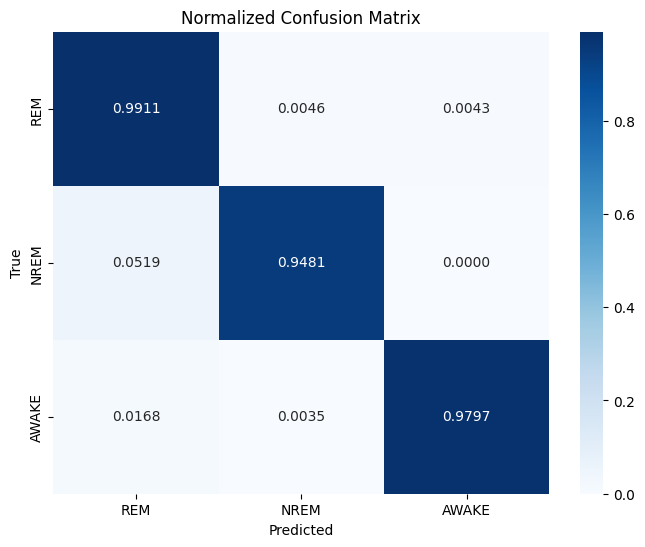

array([[0.99105071, 0.00464037, 0.00430892],
       [0.05185185, 0.94814815, 0.        ],
       [0.01684088, 0.00348432, 0.9796748 ]])

In [6]:
import numpy as np
import os
import csv
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_sort_npy_files(directory):
    # Sort files based on fold number extracted from filename
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]
    npy_files.sort(key=lambda x: int(x.split('_fold')[1].split('.npy')[0]))
    return [os.path.join(directory, f) for f in npy_files]

def compute_normalized_confusion_matrix(gt_dir, pred_dir, save_csv=False, output_csv="normalized_cm_per_fold.csv", visualize_cm=True):
    gt_files = load_and_sort_npy_files(gt_dir)
    pred_files = load_and_sort_npy_files(pred_dir)

    if len(gt_files) != len(pred_files):
        raise ValueError("Mismatch in number of ground truth and prediction files.")

    # Arrays to store all true and predicted labels
    all_y_true = []
    all_y_pred = []

    for gt_path, pred_path in zip(gt_files, pred_files):
        y_true = np.load(gt_path).flatten()
        y_pred = np.load(pred_path).flatten()
        
        # Collect true and predicted labels
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)

    # Compute the confusion matrix (absolute counts)
    cm = confusion_matrix(all_y_true, all_y_pred, labels=[0, 1, 2])

    # Normalize the confusion matrix by row (true class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Print the confusion matrix
    print("Normalized Confusion Matrix:")
    print(cm_normalized)

    # Save to CSV if requested
    if save_csv:
        np.savetxt(output_csv, cm_normalized, delimiter=",", fmt='%.4f', header="REM,NREM,AWAKE")
        print(f"\nNormalized confusion matrix saved to: {output_csv}")

    # Visualization of normalized confusion matrix using a heatmap
    if visualize_cm:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_normalized, annot=True, fmt='.4f', cmap='Blues', xticklabels=['REM', 'NREM', 'AWAKE'], yticklabels=['REM', 'NREM', 'AWAKE'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Normalized Confusion Matrix')
        plt.show()

    return cm_normalized

# ==== CONFIG ====
ground_truth_dir = '/home/glab/EEGNET/kfolds_results/ground_truth'
preds_dir = '/home/glab/EEGNET/kfolds_results/preds'
save_csv = True
visualize_cm = True  # Set to True to visualize confusion matrix

# ==== RUN ====
compute_normalized_confusion_matrix(ground_truth_dir, preds_dir, save_csv=save_csv, visualize_cm=visualize_cm)
